<a href="https://colab.research.google.com/github/SorenKyhl/PyTorch-Examples/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'2.3.0+cu121'

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Overview
This notebook implements a simple linear regression model using PyTorch.

The dataset are a set of data points generated by the function $f(x) = w*x + b$ where the ground-truth parameters $w$ and $b$ are known ahead of time.

# Dataset

In [5]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [6]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.to(device)
X_test.to(device)
y_train.to(device)
y_test.to(device)

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14});

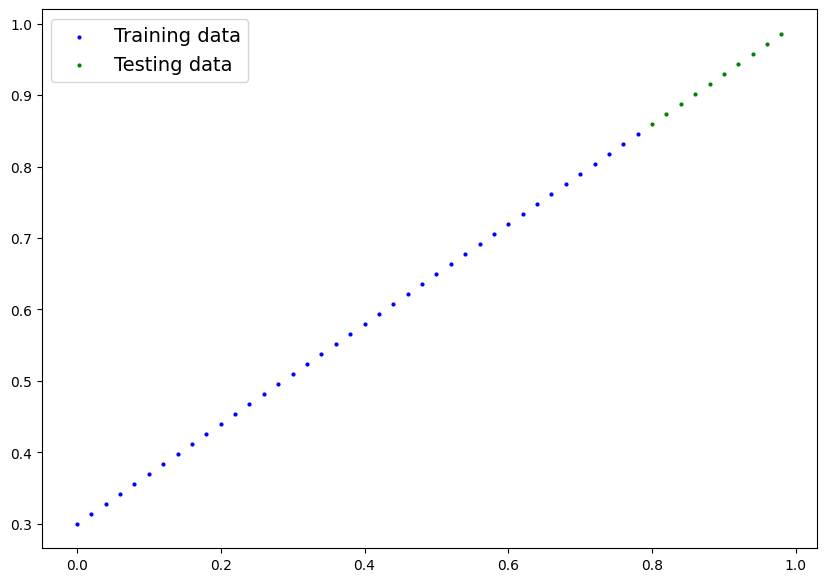

In [8]:
plot_predictions()

# Model

In [16]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(1, 1)

  def forward(self, x):
    x = self.layer(x)
    return x

model = Model().to(device)
print(model)
print(model.state_dict())

Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)
OrderedDict([('layer.weight', tensor([[-0.7164]])), ('layer.bias', tensor([0.8272]))])


does forward pass work?

In [17]:
model(X_train[0])

tensor([0.8272], grad_fn=<ViewBackward0>)

# Training

In [18]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [19]:
def train(X, y, model, loss_fn, optimizer):
  """ training loop without batching """
  model.train() # sets require_grads=True for parameters
  pred = model(X)
  loss = loss_fn(pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [20]:
train(X_train, y_train, model, loss_fn, optimizer)
model.state_dict()

OrderedDict([('layer.weight', tensor([[-0.6994]])),
             ('layer.bias', tensor([0.8322]))])

In [21]:
n_epochs = 500
epochs = []
training_loss = []
testing_loss = []
for epoch in range(n_epochs):
  train(X_train, y_train, model, loss_fn, optimizer)
  epochs.append(epoch)

  training_loss_val = loss_fn(model(X_train), y_train).detach().numpy()
  testing_loss_val = loss_fn(model(X_test), y_test).detach().numpy()

  training_loss.append(training_loss_val)
  testing_loss.append(testing_loss_val)

  if epoch % 100 == 0:
    print(f"Epoch {epoch+1}\n-------------------------------")
    print(f"Training loss: {training_loss_val:.4f} --- Testing loss: {testing_loss_val:.4f}")

print("Done!")

Epoch 1
-------------------------------
Training loss: 0.1020 --- Testing loss: 0.4911
Epoch 101
-------------------------------
Training loss: 0.0159 --- Testing loss: 0.0698
Epoch 201
-------------------------------
Training loss: 0.0025 --- Testing loss: 0.0110
Epoch 301
-------------------------------
Training loss: 0.0004 --- Testing loss: 0.0017
Epoch 401
-------------------------------
Training loss: 0.0001 --- Testing loss: 0.0003
Done!


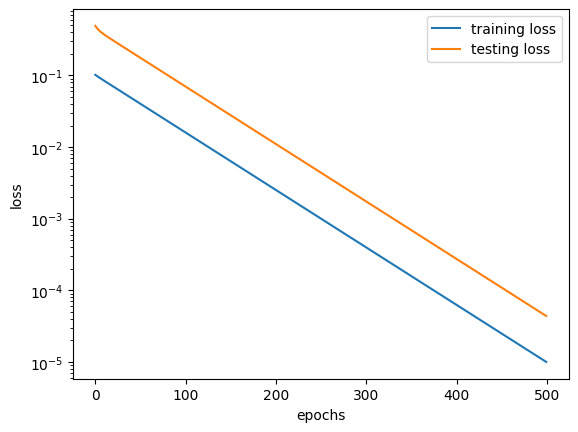

In [25]:
plt.semilogy(epochs, training_loss, label="training loss")
plt.semilogy(epochs, testing_loss, label="testing loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

# Testing

In [23]:
model.state_dict()

OrderedDict([('layer.weight', tensor([[0.6863]])),
             ('layer.bias', tensor([0.3056]))])

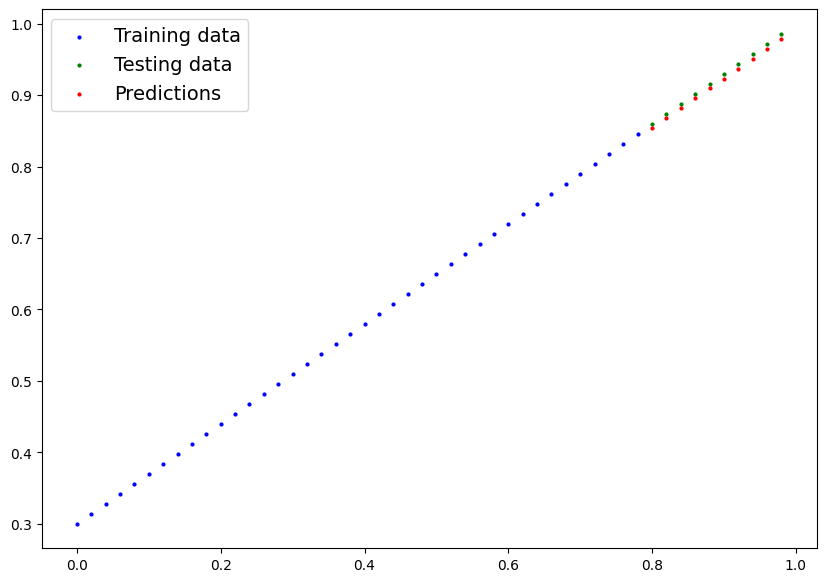

In [24]:
predictions = model(X_test).detach().numpy()
plot_predictions(predictions=predictions)